In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from Preprocessing import Preprocessing

In [2]:
pd.options.display.max_rows = 84

In [3]:
df_7200_healthy = pd.read_csv('../data/7200rpm_5kW_healthy_0.2s_0.05ms.csv')
df_7200_1turn_1rf = pd.read_csv('../data/7200rpm_5kW_1turn_1rf_0.2s_0.05ms.csv')
df_7200_1turn_001rf = pd.read_csv('../data/7200rpm_5kW_1turn_0.01rf_0.2s_0.05ms.csv')
df_7200_5turn_1rf = pd.read_csv('../data/7200rpm_5kW_5turns_1rf_0.2s_0.05ms.csv')
df_7200_5turn_001rf = pd.read_csv('../data/7200rpm_5kW_5turns_0.01rf_0.2s_0.05ms.csv')

In [4]:
preprocessed_healthy = Preprocessing(df_7200_healthy, 7200)
preprocessed_1turn_1rf = Preprocessing(df_7200_1turn_1rf, 7200)
preprocessed_1turn = Preprocessing(df_7200_1turn_001rf, 7200)
preprocessed_5turns_1rf = Preprocessing(df_7200_5turn_1rf, 7200)
preprocessed_5turns = Preprocessing(df_7200_5turn_001rf, 7200)

In [5]:
preprocessed_healthy.dataset
preprocessed_healthy.fundamental_total_sample_period(0.05)
preprocessed_healthy.nsc_augment()

preprocessed_1turn_1rf.dataset
preprocessed_1turn_1rf.fundamental_total_sample_period(0.05)
preprocessed_1turn_1rf.nsc_augment()

preprocessed_1turn.dataset
preprocessed_1turn.fundamental_total_sample_period(0.05)
preprocessed_1turn.nsc_augment()

preprocessed_5turns_1rf.dataset
preprocessed_5turns_1rf.fundamental_total_sample_period(0.05)
preprocessed_5turns_1rf.nsc_augment()

preprocessed_5turns.dataset
preprocessed_5turns.fundamental_total_sample_period(0.05)
preprocessed_5turns.nsc_augment()

d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(A)'] = 0
d:\Programing\Python\fault_detection\A-Transformer-based-Inter-turn-short-circuit-fault-diagnosis-method-for-Permanent-Magnet-Synchronous\preprocessing\Preprocessing.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset['Max(B)'] = 0
d:\Programing\Python

,Time [ms],Current(PhaseA) [A],Current(PhaseB) [A],Current(PhaseC) [A],NSC
682,34.10,12.357806,20.680904,-33.038710,0.942458
683,34.15,10.484385,22.446192,-32.930577,0.942458
684,34.20,8.736789,23.401425,-32.138214,0.942458
685,34.25,6.369954,24.055812,-30.425766,0.942458
686,34.30,2.948018,24.903677,-27.851695,0.942458
...,...,...,...,...,...
3997,199.85,28.898317,-19.528393,-9.369924,0.921193
3998,199.90,27.813073,-17.144977,-10.668097,0.921193
3999,199.95,26.646533,-13.972871,-12.673662,0.921193
4000,200.00,27.269883,-11.052771,-16.217112,0.921193


In [6]:
import DivideAndMergeDataset

In [7]:
preprocessed_healthy_nsc = preprocessed_healthy.dataset['NSC']
preprocessed_1turn_1rf_nsc = preprocessed_1turn_1rf.dataset['NSC']
preprocessed_1turn_nsc = preprocessed_1turn.dataset['NSC']
preprocessed_5turns_1rf_nsc = preprocessed_5turns_1rf.dataset['NSC']
preprocessed_5turns_nsc = preprocessed_5turns.dataset['NSC']

In [8]:
# import torch 

In [9]:

# preprocessed_healthy_nsc = torch.tensor(preprocessed_healthy_nsc.values)

In [10]:
healthy_dataset = DivideAndMergeDataset.DivideDataset(preprocessed_healthy_nsc)
healthy_subset = healthy_dataset.divide_dataset(4)

nsc_1turn_1rf_dataset = DivideAndMergeDataset.DivideDataset(preprocessed_1turn_1rf_nsc)
nsc_1turn_1rf_subset = nsc_1turn_1rf_dataset.divide_dataset(4)

nsc_1turn_dataset = DivideAndMergeDataset.DivideDataset(preprocessed_1turn_nsc)
nsc_1turn_subset = nsc_1turn_dataset.divide_dataset(4)

nsc_5turns_1rf_dataset = DivideAndMergeDataset.DivideDataset(preprocessed_5turns_1rf_nsc)
nsc_5turns_1rf_subset = nsc_5turns_1rf_dataset.divide_dataset(4)

nsc_5turns_dataset = DivideAndMergeDataset.DivideDataset(preprocessed_5turns_nsc)
nsc_5turns_subset = nsc_5turns_dataset.divide_dataset(4)

In [12]:
merged_dataset = DivideAndMergeDataset.MergeSubsets(healthy_subset[0])
merged_dataset.add_subset(nsc_1turn_1rf_subset[0])
merged_dataset.add_subset(nsc_1turn_1rf_subset[1])
merged_dataset.add_subset(nsc_1turn_1rf_subset[2])
merged_dataset.add_subset(nsc_1turn_1rf_subset[3])
merged_dataset.add_subset(nsc_1turn_subset[0])
merged_dataset.add_subset(nsc_1turn_subset[1])
merged_dataset.add_subset(nsc_1turn_subset[2])
merged_dataset.add_subset(nsc_1turn_subset[3])


In [20]:
merged_dataset.dataset

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.137417,0.137417,0.137417,0.137417,0.137417,0.137417,0.137417,0.137417,0.137417,0.137417,...,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121
1,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,0.067121,...,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756
2,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,0.044756,...,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107
3,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,0.018107,...,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732
4,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,0.011732,...,0.011907,0.011907,0.011907,0.011907,0.011907,0.011907,0.011907,0.011907,0.011907,0.011907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.172575,0.172575,0.172575,0.172575,0.172575,0.172575,0.172575,0.172575,0.172575,0.172575,...,0.171906,0.171906,0.171906,0.171906,0.171906,0.171906,0.171906,0.171906,0.171906,0.171906
86,0.177622,0.177622,0.177622,0.177622,0.177622,0.177622,0.177622,0.177622,0.177622,0.177622,...,0.231309,0.231309,0.231309,0.231309,0.231309,0.231309,0.231309,0.231309,0.231309,0.231309
87,0.278811,0.226607,0.226607,0.226607,0.226607,0.226607,0.226607,0.226607,0.226607,0.226607,...,0.172627,0.172627,0.172627,0.172627,0.172627,0.172627,0.172627,0.172627,0.172627,0.172627
88,0.172627,0.172579,0.172579,0.172579,0.172579,0.172579,0.172579,0.172579,0.172579,0.172579,...,0.171909,0.171909,0.171909,0.171909,0.171909,0.171909,0.171909,0.171909,0.171909,0.171909


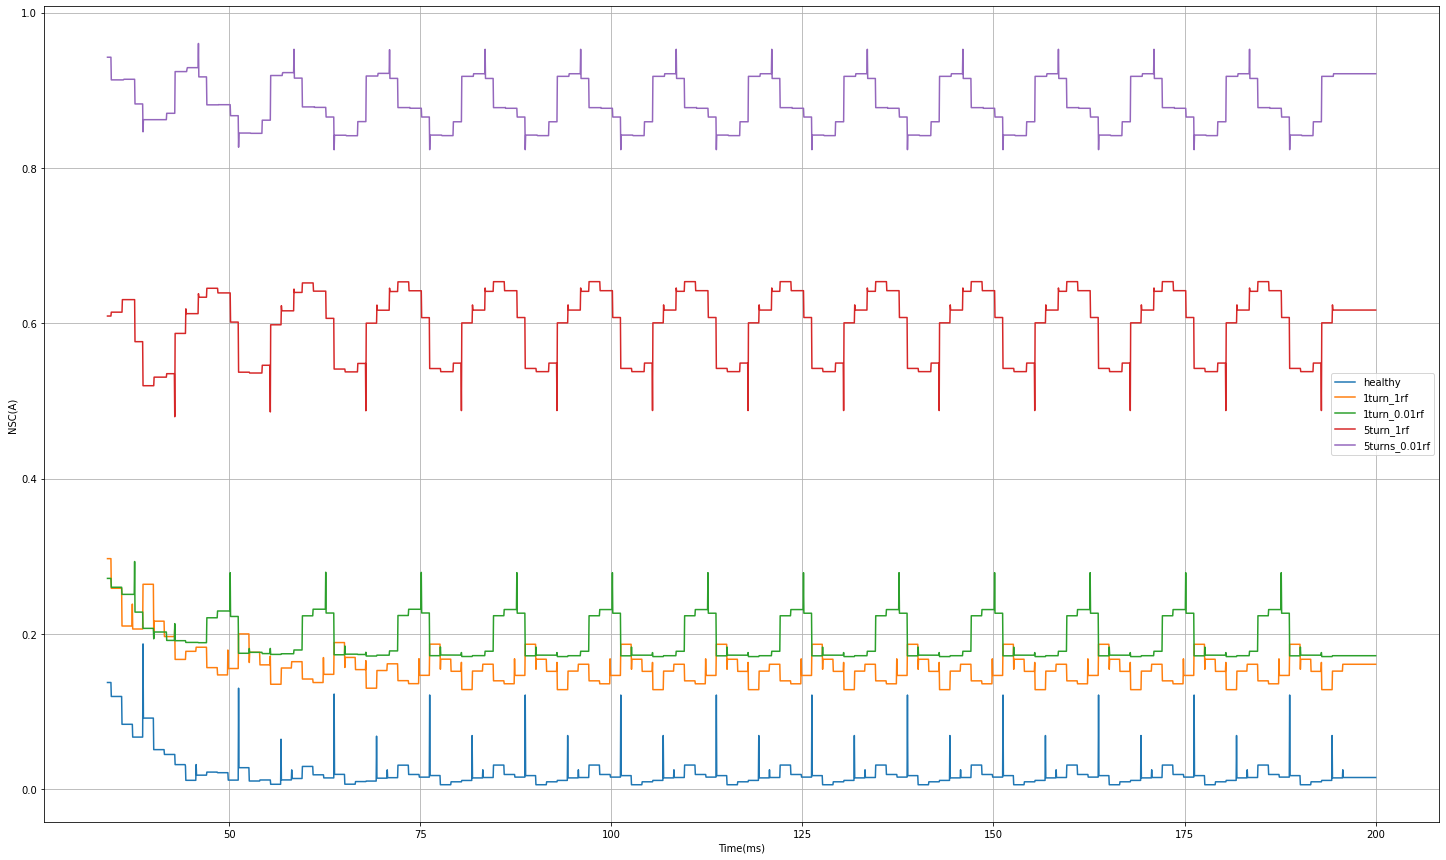

In [13]:
plt.figure(figsize=(25, 15))
plt.xlabel('Time(ms)')
plt.ylabel('NSC(A)')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_healthy.dataset['NSC'], label='healthy')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn_1rf.dataset['NSC'], label='1turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_1turn.dataset['NSC'], label='1turn_0.01rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns_1rf.dataset['NSC'], label='5turn_1rf')
plt.plot(preprocessed_healthy.dataset['Time [ms]'], preprocessed_5turns.dataset['NSC'], label='5turns_0.01rf')
plt.legend()
plt.grid(True)

In [14]:
start = len(preprocessed_healthy.dataset) // 2
end = start + preprocessed_healthy.Ns

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


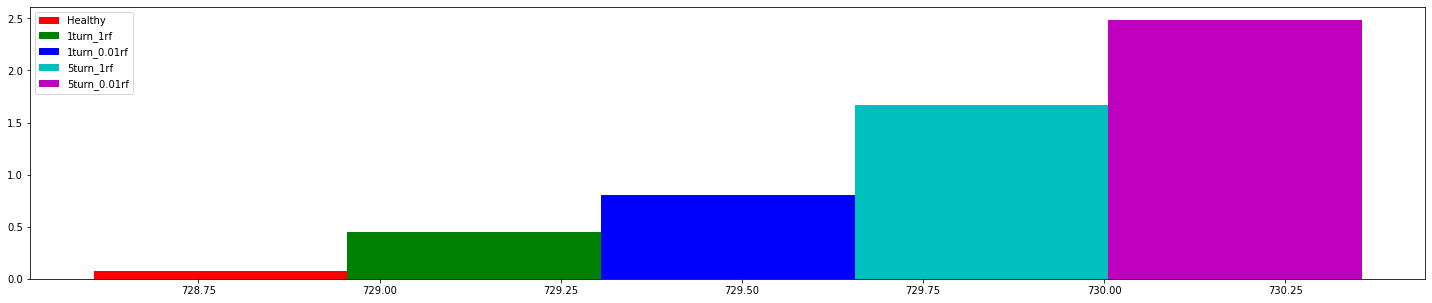

In [15]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseA) [A]', preprocessed_healthy.truncate_to_Ns_fundamental(start, end))
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseA) [A]', preprocessed_1turn_1rf.truncate_to_Ns_fundamental(start, end))
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseA) [A]', preprocessed_1turn.truncate_to_Ns_fundamental(start, end))
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseA) [A]', preprocessed_5turns_1rf.truncate_to_Ns_fundamental(start, end))
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseA) [A]', preprocessed_5turns.truncate_to_Ns_fundamental(start, end))
bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
# plt.stem(x_f2[3], y_f2[3], markerfmt='>:k', label='1turn_1rf')
# plt.stem(x_f3[3], y_f3[3], markerfmt='*:b', label='1turn')
# plt.stem(x_f4[3], y_f4[3], markerfmt='P:m', label='5turns_1rf')
# plt.stem(x_f5[3], y_f5[3], markerfmt='x:g', label='5turns')
plt.legend()
plt.show()


In [16]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseB) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseB) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseB) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseB) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseB) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

TypeError: dft() missing 1 required positional argument: 'data'

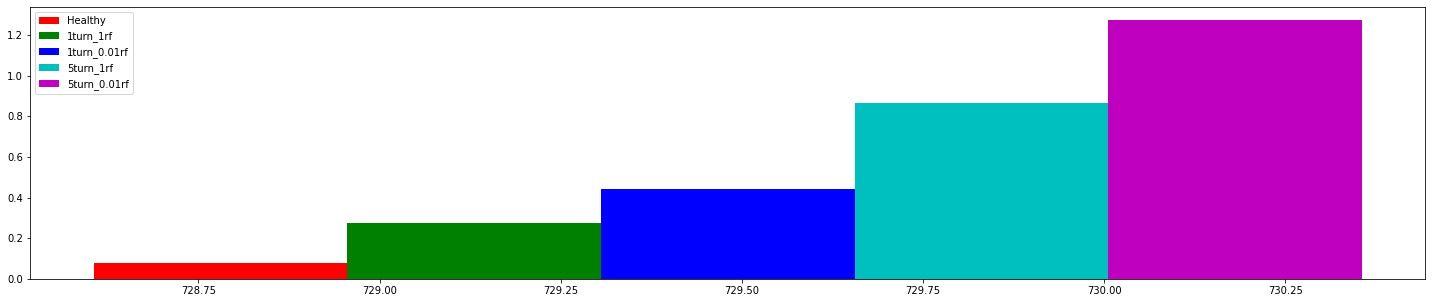

In [ ]:
x_f, y_f = preprocessed_healthy.dft('Current(PhaseC) [A]')
x_f2, y_f2 = preprocessed_1turn_1rf.dft('Current(PhaseC) [A]')
x_f3, y_f3 = preprocessed_1turn.dft('Current(PhaseC) [A]')
x_f4, y_f4 = preprocessed_5turns_1rf.dft('Current(PhaseC) [A]')
x_f5, y_f5 = preprocessed_5turns.dft('Current(PhaseC) [A]')

bar_width = 0.35
plt.figure(figsize=(25, 5))
plt.bar(x_f[3], y_f[3], bar_width, color='r', label='Healthy')
plt.bar(x_f2[3] + bar_width, y_f2[3], bar_width, color='g', label='1turn_1rf')
plt.bar(x_f3[3] + 2*bar_width, y_f3[3], bar_width, color='b', label='1turn_0.01rf')
plt.bar(x_f4[3] + 3*bar_width, y_f4[3], bar_width, color='c', label='5turn_1rf')
plt.bar(x_f5[3] + 4*bar_width, y_f5[3], bar_width, color='m', label='5turn_0.01rf')
plt.legend()
plt.show()

In [ ]:
preprocessed_healthy.Ns

83

In [ ]:
np.random.seed()
a = np.random.choice(83, 10)
print(a)

[24 73 34 18 25 30 35  7 57  0]
